In [168]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [169]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.7/site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [170]:
pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /opt/anaconda3/lib/python3.7/site-packages (0.12.2)
Note: you may need to restart the kernel to use updated packages.


In [171]:
df = pd.read_csv('/Users/dooinnkim/ironhack_da_may_2023/lab-customer-analysis-round-4/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [172]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [173]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [174]:
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [175]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## 1. Datatype check, creating numerical & categorical dataframes

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
customer                         9134 non-null object
state                            9134 non-null object
customer_lifetime_value          9134 non-null float64
response                         9134 non-null object
coverage                         9134 non-null object
education                        9134 non-null object
effective_to_date                9134 non-null object
employmentstatus                 9134 non-null object
gender                           9134 non-null object
income                           9134 non-null int64
location_code                    9134 non-null object
marital_status                   9134 non-null object
monthly_premium_auto             9134 non-null int64
months_since_last_claim          9134 non-null int64
months_since_policy_inception    9134 non-null int64
number_of_open_complaints        9134 non-null int64
number_of_policies               

In [177]:
# Get the numerical columns
numerical = df.select_dtypes(include=['int64', 'float64'])

# Get the categorical columns
categoricals = df.select_dtypes(include=['object', 'category'])


## 2. Draw distibution plots (Seaborn) and histograms(Matplotlib)

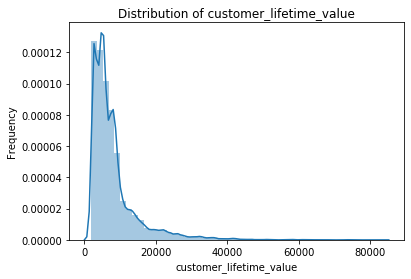

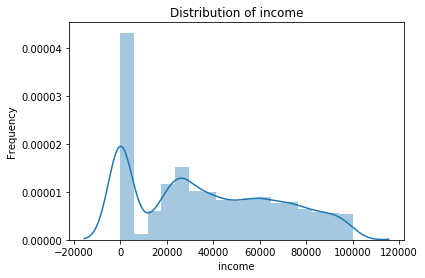

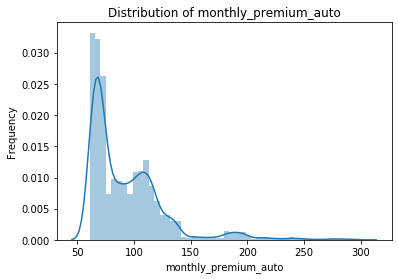

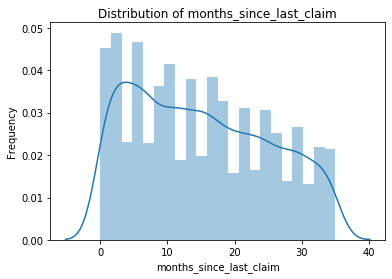

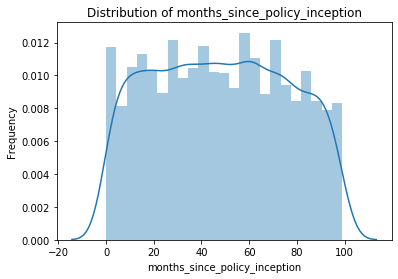

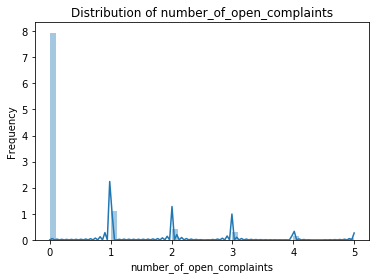

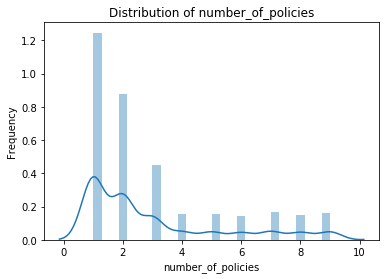

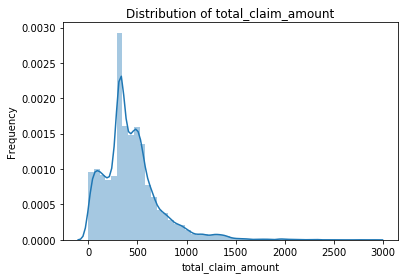

In [178]:
for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

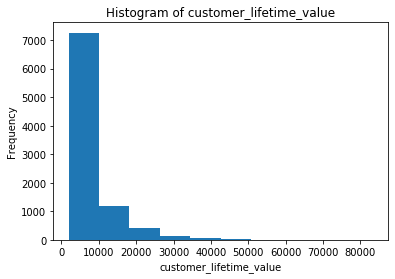

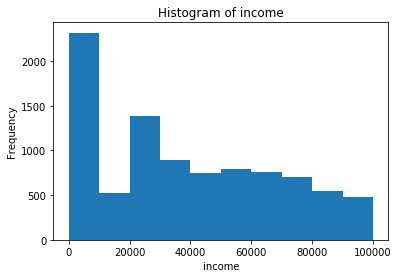

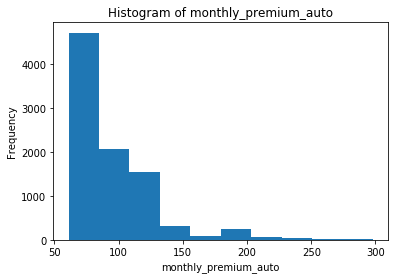

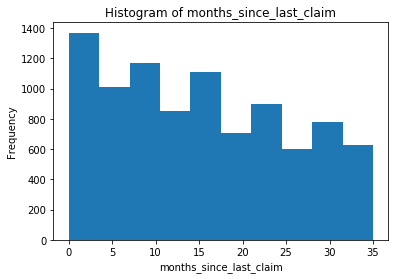

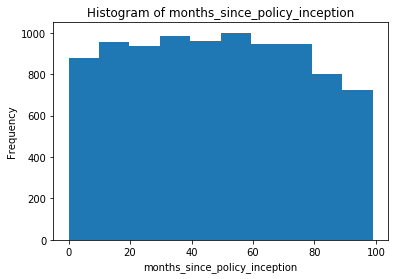

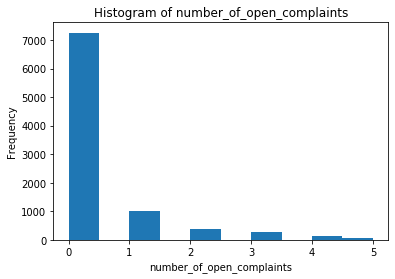

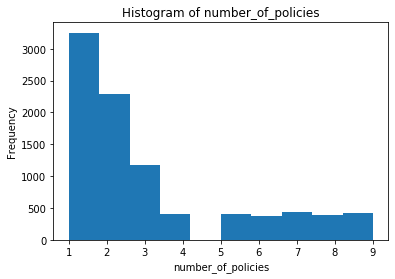

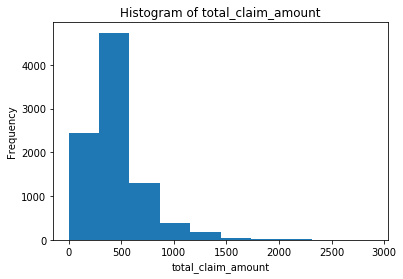

In [179]:
for col in numerical.columns:
    plt.hist(numerical[col], bins=10)
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## 3. Check multicollinearity between the features

In [180]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [181]:
correlations_matrix["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

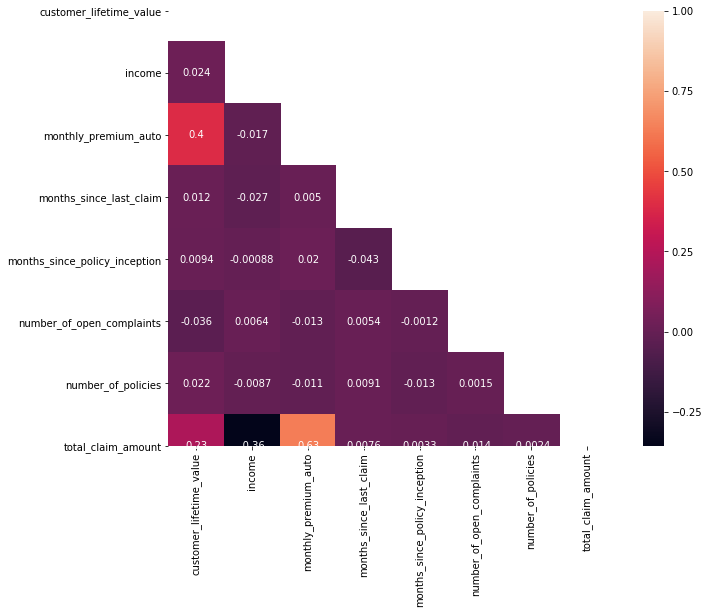

In [182]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

## 4. Drop one of the two features that how a high correlation (greater than 0.9)

According to the correlation matrix, it reveals that there are no features that shows the high correlation that is greater than 0.9. Hence, there is no features to drop.

## Linear Regression Analysis

In [183]:
x = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['total_claim_amount']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:30   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [184]:
# Now we will do a similar Linear Regression, but using sklearn library:

x = numerical.drop(['total_claim_amount'], axis=1) # watch out, rookie mistake, don't use your target to train the model
y = numerical['total_claim_amount'] # what you want to predict

lm = LinearRegression() # start the model object
lm.fit(x,y) # fit your regression line / train the model
# lm.coef_ # lm.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
# predictions = lm.predict(x)

# rmse = mean_squared_error(y, predictions, squared=False)
# mae = mean_absolute_error(y, predictions)



# print("R2_score:", round(lm.score(x,y),2)) # or r2_score(Y, predictions)
# print("RMSE:", rmse)
# print("MAE:", mae)


predictions = lm.predict(x)

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.52
RMSE: 201.53347925902824
MAE: 144.38290074277194
